In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder

In [ ]:
from google.colab import drive
drive.mount("/content/drive")
'''
# IMPORT DATA
training_set_features = pd.read_csv('/content/training_set_features.csv')
training_set_labels = pd.read_csv('/content/training_set_labels.csv')
test_set_features = pd.read_csv('/content/test_set_features.csv')'''

training_set_features = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/FIND-IT/training_set_features.csv')
training_set_labels = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/FIND-IT/training_set_labels.csv')
test_set_features = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/FIND-IT/test_set_features.csv')

Mounted at /content/drive


## DROP NULL ROW

In [ ]:
'''#training_set_features_clear = training_set_features.fillna(0.5)
#training_set_features_clear = training_set_features.fillna(training_set_features.median().iloc[0])   
training_set_features_clear = training_set_features.dropna()
#training_set_features_clear= training_set_features.dropna(subset=["behavioral_face_mask", "behavioral_wash_hands", "behavioral_antiviral_meds", 
                                                            #"behavioral_outside_home", "behavioral_large_gatherings", "behavioral_large_gatherings", "h1n1_concern",
                                                            #"h1n1_knowledge", "h1n1_knowledge", "behavioral_touch_face", "behavioral_avoidance", "household_children",
                                                            #"household_adults", "opinion_h1n1_risk", "opinion_h1n1_vacc_effective", "opinion_h1n1_sick_from_vacc",
                                                            #"opinion_seas_vacc_effective", "opinion_seas_risk", "opinion_seas_sick_from_vacc", "health_worker",
                                                            #"child_under_6_months", "chronic_med_condition"])
#training_set_features_clear.isna().sum().sort_values()
#training_set_labels_clear = training_set_labels[['h1n1_vaccine','seasonal_vaccine']]
training_set_labels_clear = pd.merge(training_set_labels,training_set_features_clear,on='respondent_id').dropna()[['h1n1_vaccine','seasonal_vaccine']]  
training_set_features_clear = training_set_features_clear[training_set_features_clear.columns[1:]]   
#test_set_features= test_set_features.dropna(subset=["behavioral_face_mask", "behavioral_wash_hands", "behavioral_antiviral_meds", 
                                                            #"behavioral_outside_home", "behavioral_large_gatherings", "behavioral_large_gatherings", "h1n1_concern",
                                                            #"h1n1_knowledge", "h1n1_knowledge", "behavioral_touch_face", "behavioral_avoidance", "household_children",
                                                            #"household_adults", "opinion_h1n1_risk", "opinion_h1n1_vacc_effective", "opinion_h1n1_sick_from_vacc",
                                                            #"opinion_seas_vacc_effective", "opinion_seas_risk", "opinion_seas_sick_from_vacc", "health_worker",
                                                            #"child_under_6_months", "chronic_med_condition"])'''

In [ ]:
print(test_set_features.isna().sum().sort_values())
print("Shape dari test_set_features : {}".format(test_set_features.shape))
0.05*26708

respondent_id                      0
race                               0
sex                                0
hhs_geo_region                     0
age_group                          0
census_msa                         0
behavioral_face_mask              19
behavioral_wash_hands             40
behavioral_large_gatherings       72
behavioral_antiviral_meds         79
behavioral_outside_home           82
h1n1_concern                      85
h1n1_knowledge                   122
behavioral_touch_face            128
behavioral_avoidance             213
household_adults                 225
household_children               225
opinion_h1n1_sick_from_vacc      375
opinion_h1n1_risk                380
opinion_h1n1_vacc_effective      398
opinion_seas_vacc_effective      452
opinion_seas_risk                499
opinion_seas_sick_from_vacc      521
health_worker                    789
child_under_6_months             813
chronic_med_condition            932
education                       1407
m

1335.4

## ENCODER

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# membuat encoder
encoder = OneHotEncoder()

# melakukan fit transform pada data train
#X_encoded = encoder.fit_transform(training_set_features[list(selected_names.columns)])
X_encoded = encoder.fit_transform(training_set_features_clear)
X_encoded_array = pd.DataFrame(X_encoded.toarray())

In [ ]:
X_encoded_array

,0,1,2,3,4,5,6,7,8,9,...,141,142,143,144,145,146,147,148,149,150
0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6432,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6433,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6434,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6435,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


## SPLIT TRAIN TEST

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_encoded_array
                                                    ,training_set_labels_clear, test_size=0.2, random_state=42) 

In [ ]:
X_train, X_test, y_train, y_test = X_train.values, X_test.values, y_train.values, y_test.values

# MODEL

Perbedaan antara multilabel dan multiclass adalah jumlah label yang diterapkan pada setiap observasi. Dalam klasifikasi multiclass, satu label diterapkan pada setiap observasi. Dalam klasifikasi multilabel, daftar label yang diterapkan pada setiap observasi dapat berkisar dari tidak ada label hingga setiap label yang mungkin1. Misalnya, jika kita ingin mengklasifikasikan gambar hewan menjadi kucing, anjing, atau ayam, maka ini adalah masalah klasifikasi multiclass karena setiap gambar hanya bisa memiliki satu label. Namun, jika kita ingin mengklasifikasikan gambar hewan menjadi berbulu, berkaki empat, atau bersayap, maka ini adalah masalah klasifikasi multilabel karena setiap gambar bisa memiliki lebih dari satu label.

In [ ]:
from tensorflow.keras.optimizers.schedules import ExponentialDecay

initial_learning_rate = 1e-2
decay_steps = 10000
decay_rate = 0.9

lr_schedule = ExponentialDecay(
    initial_learning_rate,
    decay_steps,
    decay_rate,
    staircase=True)


model = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(2,activation='sigmoid')
])

model.compile(optimizer=tf.keras.optimizers.Adagrad(learning_rate=lr_schedule), 
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), metrics=[tf.keras.metrics.AUC()])

In [ ]:
history = model.fit(X_train, y_train, epochs=30, verbose=1, validation_data=(X_test, y_test))

Epoch 1/30
161/161 [==============================] - 2s 4ms/step - loss: 0.6234 - auc_1: 0.6706 - val_loss: 0.5495 - val_auc_1: 0.7863
Epoch 2/30
161/161 [==============================] - 0s 2ms/step - loss: 0.5124 - auc_1: 0.8203 - val_loss: 0.4745 - val_auc_1: 0.8414
Epoch 3/30
161/161 [==============================] - 0s 2ms/step - loss: 0.4710 - auc_1: 0.8452 - val_loss: 0.4565 - val_auc_1: 0.8559
Epoch 4/30
161/161 [==============================] - 0s 2ms/step - loss: 0.4541 - auc_1: 0.8570 - val_loss: 0.4388 - val_auc_1: 0.8640
Epoch 5/30
161/161 [==============================] - 0s 2ms/step - loss: 0.4430 - auc_1: 0.8645 - val_loss: 0.4317 - val_auc_1: 0.8694
Epoch 6/30
161/161 [==============================] - 0s 3ms/step - loss: 0.4340 - auc_1: 0.8705 - val_loss: 0.4259 - val_auc_1: 0.8733
Epoch 7/30
161/161 [==============================] - 1s 4ms/step - loss: 0.4281 - auc_1: 0.8743 - val_loss: 0.4222 - val_auc_1: 0.8758
Epoch 8/30
161/161 [============================

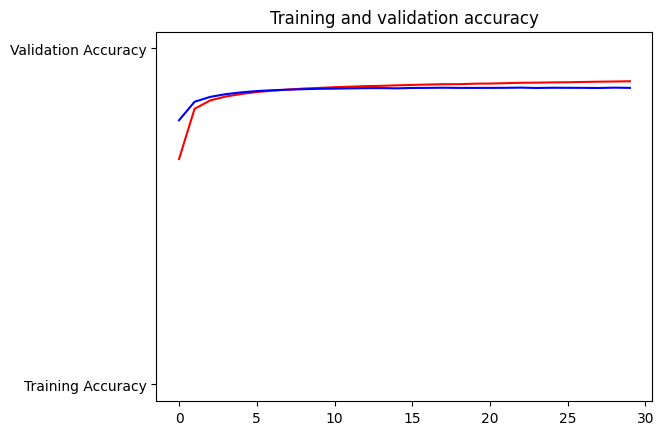

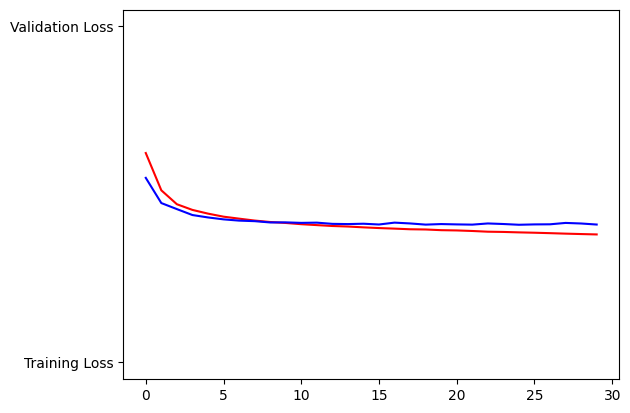

In [ ]:
acc= history.history['auc_1']
val_acc= history.history['val_auc_1']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc))

plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.show()
print("")

plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.show()

In [ ]:
probabilities_train = model.predict(X_train)
probabilities_test = model.predict(X_test)
results_train = np.array([[1 if p > 0.5 else 0 for p in row] for row in probabilities_train])
results_test = np.array([[1 if p > 0.5 else 0 for p in row] for row in probabilities_test])

41/41 [==============================] - 0s 1ms/step


In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_train = roc_auc_score(results_train,y_train, average="macro")
roc_auc_test = roc_auc_score(results_test,y_test, average="macro")

print(roc_auc_train)
print(roc_auc_test)

0.8280023086980999
0.8050692290160624


# TEST

In [ ]:
test_set_features_clear = test_set_features[test_set_features.columns[1:]].fillna(test_set_features.mode().iloc[0])
test_set_features_clear

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,"> $75,000",Not Married,Rent,Employed,mlyzmhmf,"MSA, Not Principle City",1.0,0.0,atmlpfrs,hfxkjkmi
1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,Non-MSA,3.0,0.0,atmlpfrs,xqwwgdyp
2,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,...,"> $75,000",Married,Own,Employed,lrircsnp,Non-MSA,1.0,0.0,nduyfdeo,pvmttkik
3,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,lrircsnp,"MSA, Not Principle City",1.0,0.0,fcxhlnwr,xtkaffoo
4,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,lzgpxyit,Non-MSA,0.0,1.0,fcxhlnwr,mxkfnird
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26703,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,dqpwygqj,"MSA, Principle City",1.0,1.0,fcxhlnwr,xtkaffoo
26704,3.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,Below Poverty,Married,Rent,Employed,qufhixun,Non-MSA,1.0,3.0,fcxhlnwr,vlluhbov
26705,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,qufhixun,"MSA, Not Principle City",1.0,0.0,fcxhlnwr,xtkaffoo
26706,3.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,bhuqouqj,"MSA, Not Principle City",1.0,0.0,fcxhlnwr,xtkaffoo


In [ ]:
X_encoded = encoder.fit_transform(test_set_features_clear)
X_encoded_array = pd.DataFrame(X_encoded.toarray())
X_encoded_array=X_encoded_array[X_encoded_array.columns[:-2]] 

In [ ]:
hasil = model.predict(X_encoded_array)

835/835 [==============================] - 2s 2ms/step


In [ ]:
hasil = pd.DataFrame(hasil)
hasil.columns = ['h1n1_vaccine','seasonal_vaccine']
hasil.insert(0,'respondent_id',test_set_features['respondent_id'].values)

In [ ]:
hasil.to_csv('result.csv',index=False)

In [ ]:
from google.colab import files

In [ ]:
files.download('result.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>